In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data into a DataFrame
viewer_df = pd.read_csv('mock_viewer_data.csv')
viewer_df.head()

,Username,Country,Title,Date Watched,Percentage Watched,Rating
0,nguyenjames,Namibia,To All The Boys: Always And Forever,2022-07-26,20.156132,R
1,ericramirez,Azerbaijan,Iceman,2022-09-29,76.724487,TV-Y7
2,ccole,Saint Vincent and the Grenadines,Almost Love,2022-08-11,1.713326,TV-MA
3,russellbrandon,Kyrgyz Republic,She-Ra and the Princesses of Power,2023-03-12,15.677891,R
4,courtneydavis,Guam,Uncovered,2023-03-14,2.444522,TV-MA


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime as dt

temp_df = pd.DataFrame()
temp_df['Country'] = viewer_df['Country']
temp_df['Title'] = viewer_df['Title']
temp_df['Percentage Watched'] = viewer_df['Percentage Watched']
temp_df['Rating'] = viewer_df['Rating']

date_convert = viewer_df.columns[viewer_df.columns.str.contains("Date Watched")]
viewer_df[date_convert] = viewer_df[date_convert].apply(pd.to_datetime)

# Converting the above mentioned column types from object to datetime format
viewer_df["Date Watched"].max()
today_date = dt.datetime(2023, 5, 31)

temp_df["LastWatchDays"] = (today_date - viewer_df["Date Watched"]).astype('timedelta64[D]')

temp_df.head()


,Country,Title,Percentage Watched,Rating,LastWatchDays
0,Namibia,To All The Boys: Always And Forever,20.156132,R,309.0
1,Azerbaijan,Iceman,76.724487,TV-Y7,244.0
2,Saint Vincent and the Grenadines,Almost Love,1.713326,TV-MA,293.0
3,Kyrgyz Republic,She-Ra and the Princesses of Power,15.677891,R,80.0
4,Guam,Uncovered,2.444522,TV-MA,78.0


In [ ]:
temp_df= pd.get_dummies(temp_df)
temp_df.head()

,Percentage Watched,LastWatchDays,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antarctica (the territory South of 60 deg S),...,Rating_PG-13,Rating_R,Rating_TV-14,Rating_TV-G,Rating_TV-MA,Rating_TV-PG,Rating_TV-Y,Rating_TV-Y7,Rating_TV-Y7-FV,Rating_UR
0,20.156132,309.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,76.724487,244.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.713326,293.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,15.677891,80.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2.444522,78.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(temp_df)

scaled_data = scaler.transform(temp_df)
scaled_data

array([[-1.04344194,  1.38389292, -0.04476615, ..., -0.19324699,
        -0.04476615, -0.0316386 ],
       [ 0.92638344,  0.75645219, -0.04476615, ...,  5.1747249 ,
        -0.04476615, -0.0316386 ],
       [-1.68565804,  1.22944597, -0.04476615, ..., -0.19324699,
        -0.04476615, -0.0316386 ],
       ...,
       [-1.34919022, -1.39615215, -0.04476615, ..., -0.19324699,
        -0.04476615, -0.0316386 ],
       [ 1.2982975 ,  0.26415255, -0.04476615, ..., -0.19324699,
        -0.04476615, -0.0316386 ],
       [ 0.2121611 ,  0.85298154, -0.04476615, ..., -0.19324699,
        -0.04476615, -0.0316386 ]])

In [ ]:
#creates for each value of K the corresponding KMeans model and saves its inertia along with the actual K value.
def find_best_clusters(df, maximum_K):

    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):

        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)


    return clusters_centers, k_values

In [ ]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

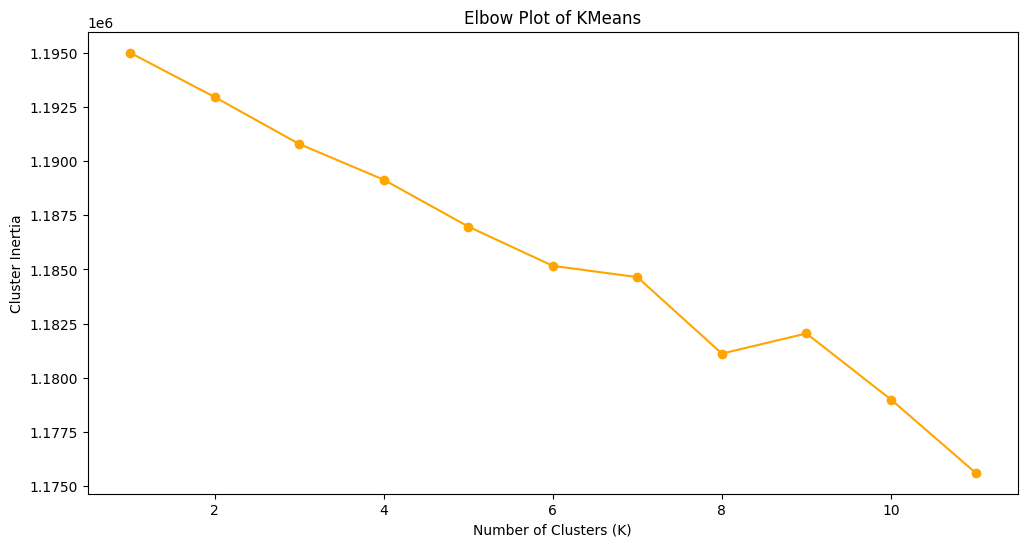

In [ ]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

In [ ]:
#drop the inertia is minimal after K=5 hence 5 can be considered as the optimal number of clusters.
#create the model
kmeans_model = KMeans(n_clusters = 5)

kmeans_model.fit(scaled_data)

viewer_df["clusters"] = kmeans_model.labels_
temp_df["clusters"] = kmeans_model.labels_

temp_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Percentage Watched,LastWatchDays,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antarctica (the territory South of 60 deg S),...,Rating_R,Rating_TV-14,Rating_TV-G,Rating_TV-MA,Rating_TV-PG,Rating_TV-Y,Rating_TV-Y7,Rating_TV-Y7-FV,Rating_UR,clusters
0,20.156132,309.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
1,76.724487,244.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
2,1.713326,293.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,15.677891,80.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
4,2.444522,78.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


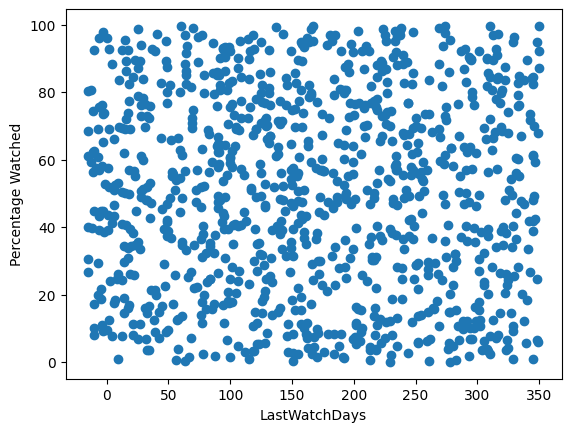

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(temp_df["LastWatchDays"], temp_df["Percentage Watched"])
plt.xlabel("LastWatchDays")
plt.ylabel("Percentage Watched")
plt.show()


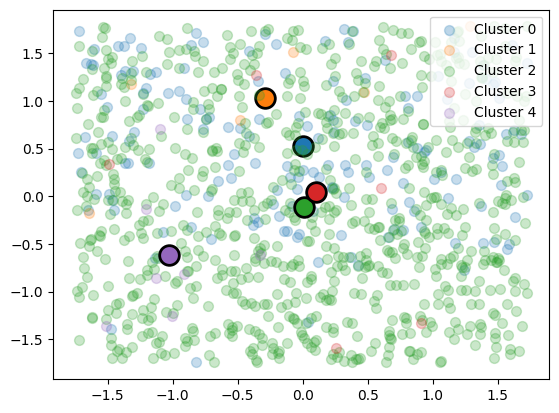

In [ ]:
import matplotlib.cm as cm
from itertools import cycle

X = scaled_data
colors = cycle(cm.tab10.colors)
y_kmeans = kmeans_model.predict(X)
centers = kmeans_model.cluster_centers_

plt.figure()
labels = {0: "Cluster 0", 1: "Cluster 1", 2: "Cluster 2", 3: "Cluster 3", 4: "Cluster 4"}

for i in range(5):
    # Plot one cluster for each iteration
    color = next(colors)
    # Find indices corresponding to cluster i
    idx = y_kmeans == i
    # Plot cluster
    plt.scatter(X[idx, 0], X[idx, 1], color=color, s=50, label=labels[i], alpha=0.25)
    # Plot center
    plt.scatter(
        centers[i, 0],
        centers[i, 1],
        edgecolors="k",
        linewidth=2,
        color=color,
        s=200,
        alpha=1,
    )

plt.legend()
plt.show()

In [ ]:
temp_df.head()

,Percentage Watched,LastWatchDays,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antarctica (the territory South of 60 deg S),...,Rating_R,Rating_TV-14,Rating_TV-G,Rating_TV-MA,Rating_TV-PG,Rating_TV-Y,Rating_TV-Y7,Rating_TV-Y7-FV,Rating_UR,clusters
0,20.156132,309.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
1,76.724487,244.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
2,1.713326,293.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,15.677891,80.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
4,2.444522,78.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


In [ ]:
import random
user = {
    'Country': 'South Korea',
    'Title': 'Black Mirror',
    'Date Watched': '2022-02-11',
    'Percentage Watched': 90,
    'Rating': 'Rating_TV-Y7'
}
features = ['Country', 'Title', 'Date Watched', 'Percentage Watched','Rating']

bcd = viewer_df[features].copy()
bcd = pd.get_dummies(bcd)

# Prepare user data for clustering
user_data = pd.DataFrame(user, index=[0])
date_convert = user_data.columns[user_data.columns.str.contains("Date Watched")]
user_data[date_convert] = user_data[date_convert].apply(pd.to_datetime)

# Converting the above mentioned column types from object to datetime format
user_data["Date Watched"].max()
today_date = dt.datetime(2023, 5, 14)

user_data["Date Watched"] = (today_date - user_data["Date Watched"]).astype('timedelta64[D]')


user_data_encoded = pd.get_dummies(user_data[features]).reindex(columns=bcd.columns, fill_value=0)

# Find the cluster for the user
user_cluster = kmeans_model.predict(user_data_encoded)[0]
# Get viewers in the same cluster as the user
cluster_viewers = viewer_df[viewer_df['clusters'] == user_cluster]
# Count the occurrences of each title in the recommendations
print(cluster_viewers['Title'].value_counts())
#print(cluster_viewers)
title_counts = cluster_viewers[cluster_viewers['Title'] != user['Title']]['Title'].reset_index(drop=True).value_counts()


top_titles = title_counts.index[:20].tolist()
random.shuffle(top_titles)
top_titles = top_titles[:5]



print("Recommendations for user (based on most frequent titles):")
print(top_titles)


Miniforce X                2
Mine                       2
Urvi                       2
Poms                       2
Good Luck                  2
                          ..
Dilan 1990                 1
Ugly Delicious             1
Tremors                    1
Nimbe                      1
Enissa Amani: Ehrenwort    1
Name: Title, Length: 165, dtype: int64
Recommendations for user (based on most frequent titles):
['Teresa', 'Pororo - The Little Penguin', 'Heroin(e)', 'The Super Mario Bros. Super Show!', 'Zulu Man in Japan']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
